In [ ]:
#--Wranlging--
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn as sk
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [46]:
all_players=pd.read_csv('All_Player_Ratings.csv',encoding='latin1')

C:\Users\simle\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (87,89,90) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
#--Wrangling--
converted_players=pd.read_csv('Converted_Players.csv',encoding='latin1')

In [48]:
#--Wrangling--
england_players=pd.read_csv('England_Players.csv',encoding='latin1')
spain_players=pd.read_csv('Spain_Players.csv',encoding='latin1')
italy_players=pd.read_csv('Italy_Players.csv',encoding='latin1')
france_players=pd.read_csv('France_Players.csv',encoding='latin1')
germany_players=pd.read_csv('Germany_Players.csv',encoding='latin1')

In [49]:
#--Wrangling--
england_teams=pd.read_csv('England_Team_Stats.csv',encoding='latin1')
france_teams=pd.read_csv('France_Team_Stats.csv',encoding='latin1')
italy_teams=pd.read_csv('Italy_Team_Stats.csv',encoding='latin1')
spain_teams=pd.read_csv('Spain_Team_Stats.csv',encoding='latin1')
germany_teams=pd.read_csv('Germany_Team_Stats.csv',encoding='latin1')

In [50]:
#--Wrangling--
#Assign league weightings to each team in respective league
league_rankings={'Spain':1662/1662,'England':1660.4/1662,'Germany':1654.98/1662,'Italy':1634.1/1662,'France':1584.4/1662}


In [51]:
#--Wrangling--
#Apply league weightings to each team' success metric in respective league
england_teams['Weighted_Success']=england_teams.goals_scored*league_rankings['England']
france_teams['Weighted_Success']=france_teams.goals_scored*league_rankings['France']
italy_teams['Weighted_Success']=italy_teams.goals_scored*league_rankings['Italy']
germany_teams['Weighted_Success']=germany_teams.goals_scored*league_rankings['Germany']
spain_teams['Weighted_Success']=spain_teams.goals_scored*league_rankings['Spain']

In [53]:
#--Wrangling--
#Extract pertinent offensive skill attributes from players list 
players=converted_players.iloc[:,[0,1,4,7,18,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,73]]

In [54]:
#--Wrangling--
#Create frame of teams and success metrics
teams=pd.concat([england_teams,spain_teams,germany_teams,france_teams,italy_teams],axis=0)
teams2=teams.iloc[:,[1,280]]

In [55]:
#Create each player's average of only offensive attributes
Offensive_Overall=[]
for i in range(0,len(players)):
    Offensive_Overall.append(round(np.mean(players.iloc[i,5:27]),1))
players['Offensive_Overall']=Offensive_Overall

C:\Users\simle\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [56]:
#--Wrangling--
#Extract top five offensively inclined players from each team
players=players.rename(columns={'Club 2':'Club'})
players=players.sort_values(['Club','Offensive_Overall'],ascending=[True,False])
players_top_5=players.groupby('Club').apply(lambda i:i.iloc[0:5])


In [57]:
#--Wrangling--
#Create list of column names to be mutated later, 
calc_list=list(players_top_5.columns[4:27])
print(calc_list)

['Position', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Positioning', 'Offensive_Overall']


In [58]:
#--Wrangling--
#Create player to team index to fill in blank Club values from apply function and merge into players_top_5
player_team_index=players.iloc[:,[0,3]]
players2=pd.merge(player_team_index,players_top_5,on='ID',how='right')
players2=players2.drop(columns='Club_y')
players2=players2.rename(columns={'Club_x':'Club'})

In [59]:
#--Wrangling--
#Create averages and standard deviation variables of each attribute aggregated by team
players_avg=players2.pivot_table(index='Club',values=calc_list,aggfunc=np.mean)
players_std=players2.pivot_table(index='Club',values=calc_list,aggfunc=np.std)
print(players_avg.columns)

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl',
       'Crossing', 'Curve', 'Dribbling', 'FKAccuracy', 'Finishing',
       'HeadingAccuracy', 'Jumping', 'LongPassing', 'LongShots',
       'Offensive_Overall', 'Positioning', 'Reactions', 'ShortPassing',
       'SprintSpeed', 'Stamina', 'Strength', 'Volleys'],
      dtype='object')


In [60]:
#--Wrangling--
#rename columns, ONLY RUN ONCE!!!
players_avg.columns=[i+"_avg" for i in players_avg]
players_std.columns=[i+"_std" for i in players_std]

In [61]:
#--Wrangling--
#merge avg and std
players_avg.reset_index()
players_std.reset_index()
player_aggregate=pd.merge(players_avg,players_std,on='Club',how='left')

In [62]:
#--Wrangling--
#combine skills and success metrics
teams3=pd.merge(player_aggregate,teams2,left_on='Club',right_on='common_name',how='left')
teams4=teams3.dropna()
print(teams2.head())

         common_name  Weighted_Success
0            Arsenal         73.928761
1  Tottenham Hotspur         73.928761
2    Manchester City        105.897954
3     Leicester City         55.946089
4         Stoke City         34.966306


[[1.         0.82422812]
 [0.82422812 1.        ]]


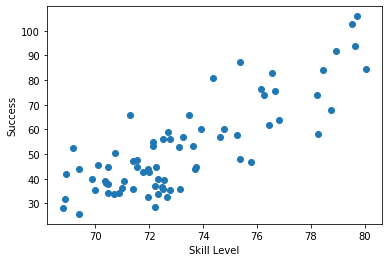

In [65]:
#--Inferential Statitstics/Storytelling--
#Scatter chart skill level vs. success
plt.scatter(teams4.Offensive_Overall_avg,teams4.Weighted_Success)
plt.xlabel('Skill Level')
plt.ylabel('Success')
print(np.corrcoef(teams4.Offensive_Overall_avg,teams4.Weighted_Success))

In [70]:
#--Machine Learning--
#Model summary of expected success dependant upon offensive overall
mod=ols('Weighted_Success~Offensive_Overall_avg',teams4).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:       Weighted_Success   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     150.4
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           3.31e-19
Time:                        11:34:37   Log-Likelihood:                -275.89
No. Observations:                  73   AIC:                             555.8
Df Residuals:                      71   BIC:                             560.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -330.36

In [329]:
#--Machine Learning/Wrangling--
Predict=teams4.Offensive_Overall_avg*5.227-330.3609
teams4['predicted_goals_scored']=Predict
teams4['residual']=teams4.Weighted_Success-teams4.predicted_goals_scored
print(teams4.columns)

Index(['Acceleration_avg', 'Aggression_avg', 'Agility_avg', 'Balance_avg',
       'BallControl_avg', 'Crossing_avg', 'Curve_avg', 'Dribbling_avg',
       'FKAccuracy_avg', 'Finishing_avg', 'HeadingAccuracy_avg', 'Jumping_avg',
       'LongPassing_avg', 'LongShots_avg', 'Offensive_Overall_avg',
       'Positioning_avg', 'Reactions_avg', 'ShortPassing_avg',
       'SprintSpeed_avg', 'Stamina_avg', 'Strength_avg', 'Volleys_avg',
       'Acceleration_std', 'Aggression_std', 'Agility_std', 'Balance_std',
       'BallControl_std', 'Crossing_std', 'Curve_std', 'Dribbling_std',
       'FKAccuracy_std', 'Finishing_std', 'HeadingAccuracy_std', 'Jumping_std',
       'LongPassing_std', 'LongShots_std', 'Offensive_Overall_std',
       'Positioning_std', 'Reactions_std', 'ShortPassing_std',
       'SprintSpeed_std', 'Stamina_std', 'Strength_std', 'Volleys_std',
       'common_name', 'Weighted_Success', 'predicted_goals_scored',
       'residual'],
      dtype='object')


C:\Users\simle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\simle\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [330]:
mrf_pred=teams4.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,45]]
x_vars_p=mrf.iloc[:,0:20]
y_var_p=mrf_pred['Weighted_Success']
team_mod_pred=sm.ols('y_var_p~x_vars_p',mrf_pred).fit()
print(team_mod_pred.summary())

                            OLS Regression Results                            
Dep. Variable:                y_var_p   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     11.17
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.76e-12
Time:                        18:36:34   Log-Likelihood:                -256.57
No. Observations:                  73   AIC:                             555.1
Df Residuals:                      52   BIC:                             603.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -253.5615     42.936     -5.906   

In [332]:
#--Wrangling/Machine Learning--
#Create dataframe of attributes, coefficients, and p_values
ht=pd.read_html(team_mod_pred.summary().tables[1].as_html(),header=0,index_col=0)[0]
a=pd.DataFrame(ht)
coef_pvalue_frame=a.iloc[:,[0,3]]
cpv2=coef_pvalue_frame.reset_index(drop=True)
cpv3=cpv2.iloc[1:21,:]
cpv3['Attribute']=x_vars.columns
cpv4=cpv3
cpv4['Inverse_p_value']=1-cpv4.iloc[:,1]
cpv5=cpv4.drop(columns='P>|t|')
print(cpv5)

      coef            Attribute  Inverse_p_value
1  -0.8992     Acceleration_avg            0.701
2  -0.4318       Aggression_avg            0.867
3   0.7230          Agility_avg            0.692
4  -0.0916          Balance_avg            0.162
5   0.7177      BallControl_avg            0.348
6  -0.7163         Crossing_avg            0.862
7   0.0106            Curve_avg            0.017
8   2.2285        Dribbling_avg            0.916
9   0.2619       FKAccuracy_avg            0.492
10  0.3318        Finishing_avg            0.495
11  0.8421  HeadingAccuracy_avg            0.979
12  0.0359          Jumping_avg            0.079
13 -0.0332      LongPassing_avg            0.048
14 -0.1703        LongShots_avg            0.234
15 -0.3581      Positioning_avg            0.342
16  1.0468        Reactions_avg            0.765
17 -0.1689     ShortPassing_avg            0.114
18  0.4013      SprintSpeed_avg            0.436
19  0.2112          Stamina_avg            0.399
20  0.0589         S

C:\Users\simle\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\simle\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


#Scratch Work
#bar chart of coefficients and p-value
coef_bar=list(cpv5.iloc[:,0])
Inverse_p_value_bar=list(cpv5.iloc[:,2])
Attribute_label=list(cpv5.iloc[:,1])
barWidth=.25
x1=np.arange(len(coef_bar))
x2=[i+barWidth for i in x1]
ax2=twi
plt.bar(x1,coef_bar,width=barWidth)
plt.bar(x2,Inverse_p_value_bar,width=barWidth)
plt.xticks(Attribute_label)
plt.show()

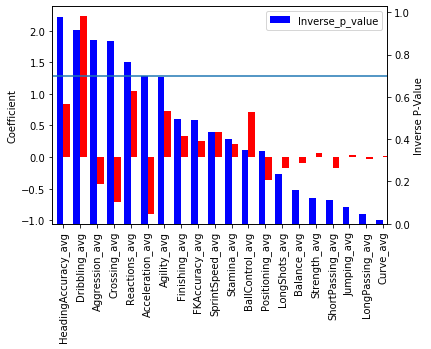

In [335]:
#--Storytelling--
#bar chart of coefficients and p-value, sorted by inverse p-value, labeled by skill attribute. Uwer can set acceptable
#p-value
sig_p_value=.3
cpv6=cpv5.sort_values(by='Inverse_p_value',ascending=False)
Attribute_label=list(cpv6.iloc[:,1])
fig=plt.figure()
ax=fig.add_subplot(111)
ax2=ax.twinx()
width=.4
cpv6.coef.plot(kind='bar',color='red',ax=ax,width=width,position=0)
cpv6.Inverse_p_value.plot(kind='bar',color='blue',ax=ax2,width=width,position=1)
ax.set_ylabel('Coefficient')
ax2.set_ylabel('Inverse P-Value')
plt.xticks(np.arange(len(Attribute_label)),Attribute_label)
plt.axhline(y=1-sig_p_value)
plt.legend()
plt.show()

In [337]:
print(cpv6)

      coef            Attribute  Inverse_p_value
11  0.8421  HeadingAccuracy_avg            0.979
8   2.2285        Dribbling_avg            0.916
2  -0.4318       Aggression_avg            0.867
6  -0.7163         Crossing_avg            0.862
16  1.0468        Reactions_avg            0.765
1  -0.8992     Acceleration_avg            0.701
3   0.7230          Agility_avg            0.692
10  0.3318        Finishing_avg            0.495
9   0.2619       FKAccuracy_avg            0.492
18  0.4013      SprintSpeed_avg            0.436
19  0.2112          Stamina_avg            0.399
5   0.7177      BallControl_avg            0.348
15 -0.3581      Positioning_avg            0.342
14 -0.1703        LongShots_avg            0.234
4  -0.0916          Balance_avg            0.162
20  0.0589         Strength_avg            0.122
17 -0.1689     ShortPassing_avg            0.114
12  0.0359          Jumping_avg            0.079
13 -0.0332      LongPassing_avg            0.048
7   0.0106          

In [150]:
print(x_vars.columns[[2,7,10]])
#A multivariate linear regression model of the impact of various offensive metrics as independent variables on overall
#weighted success identifies heading accuracy, dribbing, 

Index(['Agility_avg', 'Dribbling_avg', 'HeadingAccuracy_avg'], dtype='object')


In [153]:
#--Wrangling--
#st.dev numeric frame
teams4_std=teams4
teams5_std=teams4_std.drop(columns=['common_name','Weighted_Success','predicted_goals_scored'])
print(teams5_std.columns)

Index(['Acceleration_avg', 'Aggression_avg', 'Agility_avg', 'Balance_avg',
       'BallControl_avg', 'Crossing_avg', 'Curve_avg', 'Dribbling_avg',
       'FKAccuracy_avg', 'Finishing_avg', 'HeadingAccuracy_avg', 'Jumping_avg',
       'LongPassing_avg', 'LongShots_avg', 'Offensive_Overall_avg',
       'Positioning_avg', 'Reactions_avg', 'ShortPassing_avg',
       'SprintSpeed_avg', 'Stamina_avg', 'Strength_avg', 'Volleys_avg',
       'Acceleration_std', 'Aggression_std', 'Agility_std', 'Balance_std',
       'BallControl_std', 'Crossing_std', 'Curve_std', 'Dribbling_std',
       'FKAccuracy_std', 'Finishing_std', 'HeadingAccuracy_std', 'Jumping_std',
       'LongPassing_std', 'LongShots_std', 'Offensive_Overall_std',
       'Positioning_std', 'Reactions_std', 'ShortPassing_std',
       'SprintSpeed_std', 'Stamina_std', 'Strength_std', 'Volleys_std',
       'residual'],
      dtype='object')


In [154]:
#--Inferential Statistics/Wrangling--
#add average of each teams average offensive attributes
teams6_avg_adj=teams5_std.iloc[:,0:22]
tm_avg=[]
for i in range(0,len(teams6_avg_adj)):
    tm_avg.append(np.mean(teams6_avg_adj.iloc[i,:]))
teams6_avg_adj['Team_Average']=tm_avg
avg_delta=[]

C:\Users\simle\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [155]:
#--Wrangling--
#create dataframe of each attribute delta from average overall
avg_delta=[]
for i in range(0,21):
    avg_delta.append(teams6_avg_adj.iloc[:,i]-teams6_avg_adj.iloc[:,22])
a=pd.DataFrame(avg_delta)
avg_delta2=a.transpose()
avg_delta2.columns=teams6_avg_adj.columns[0:21]

In [156]:
#--Wrangling--
#add st.dev to average delta frame
std_frame=teams5_std.iloc[:,22:44]
delta_frame=pd.concat([avg_delta2,std_frame],axis=1)
print(delta_frame.head())

   Acceleration_avg  Aggression_avg  Agility_avg  Balance_avg  \
0          9.123636        1.923636     8.523636    12.923636   
1         13.018182      -15.781818     9.218182     6.218182   
2          2.714545       -4.885455     5.514545    -1.285455   
3          2.570909      -15.629091     3.770909     0.570909   
4          4.876364      -10.923636     4.876364    -6.123636   

   BallControl_avg  Crossing_avg  Curve_avg  Dribbling_avg  FKAccuracy_avg  \
0         6.723636     -7.876364  -4.876364       4.723636       -8.476364   
1         3.018182     -5.381818  -8.381818       3.018182       -3.781818   
2         6.114545      0.714545  -2.085455       5.914545       -1.285455   
3         8.370909     -1.029091   1.970909       6.370909       -5.829091   
4         8.076364      2.876364   1.876364       9.076364        2.276364   

   Finishing_avg  ...  LongPassing_std  LongShots_std  Offensive_Overall_std  \
0      -0.276364  ...        14.380542       6.519202       

In [157]:
#--Wrangling--
#add residual to delta frame
delta_frame['resid']=teams5_std.residual

[-0.09197660359429463, -0.2422022484881265, -0.0708197187782886, -0.19119044996793158, 0.25962449584490743, -0.30521192730240015, -0.029356064049811843, 0.22445253042092245, 0.01450883804685699, 0.31328242652582916, 0.19246400565589245, -0.08290104666032207, -0.12441981530252641, 0.12155301547420533, -0.06877734014728337, 0.26692895631300617, 0.18918492432713024, 0.1110552430374331, -0.02065989080999394, -0.051902932746056424, 0.017714912841421692, -0.03536690717654462, 0.13731898523918146, -0.17395993020252914, 0.04419368249736465, -0.09259546682492768, 0.12748948666848536, -0.1334599389015652, 0.0943779900060842, 0.004462599364134734, 0.09898783615723412, 0.09879296866971038, -0.03291303148058217, 0.1679568814621995, -0.06204664473393538, -0.005906697568455625, 0.1505048106991436, 0.2120315903708328, 0.0700042618744299, 0.051590265395103085, 0.0008808906702084257, -0.00300244721526019, 0.22832966865112572]


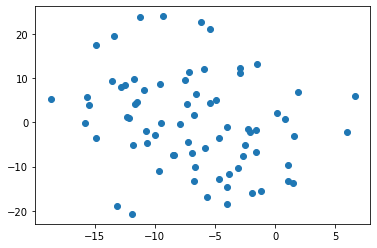

In [159]:
#--Inferential Statistics/Storytelling--
correl=[]
for i in range(0,len(delta_frame.columns)-1):
    correl.append(pearsonr(delta_frame.iloc[:,i],delta_frame.iloc[:,43])[0])
print(correl)
plt.scatter(delta_frame.iloc[:,1],delta_frame.iloc[:,43])

In [160]:
#--Wrangling/Storytelling--
tup1=zip(delta_frame.columns,correl)
print(list(tup1))

[('Acceleration_avg', -0.09197660359429463), ('Aggression_avg', -0.2422022484881265), ('Agility_avg', -0.0708197187782886), ('Balance_avg', -0.19119044996793158), ('BallControl_avg', 0.25962449584490743), ('Crossing_avg', -0.30521192730240015), ('Curve_avg', -0.029356064049811843), ('Dribbling_avg', 0.22445253042092245), ('FKAccuracy_avg', 0.01450883804685699), ('Finishing_avg', 0.31328242652582916), ('HeadingAccuracy_avg', 0.19246400565589245), ('Jumping_avg', -0.08290104666032207), ('LongPassing_avg', -0.12441981530252641), ('LongShots_avg', 0.12155301547420533), ('Offensive_Overall_avg', -0.06877734014728337), ('Positioning_avg', 0.26692895631300617), ('Reactions_avg', 0.18918492432713024), ('ShortPassing_avg', 0.1110552430374331), ('SprintSpeed_avg', -0.02065989080999394), ('Stamina_avg', -0.051902932746056424), ('Strength_avg', 0.017714912841421692), ('Acceleration_std', -0.03536690717654462), ('Aggression_std', 0.13731898523918146), ('Agility_std', -0.17395993020252914), ('Balanc

In [280]:
#--Inferential Statistics/Wrangling--
#user can set threshold of significance, build list of attributes and correlations.
thresh_set=[.19,-.19]
attr=delta_frame.columns.drop(delta_frame.columns[-1])
delta_frame2=pd.DataFrame([list(attr),correl])
corr_frame=pd.DataFrame.transpose(delta_frame2)
corr_frame2=corr_frame.sort_values(by=1,ascending=False)
attribute_selection=corr_frame2.loc[(corr_frame2[1]>thresh_set[0])|(corr_frame2[1]<thresh_set[1])]
print(corr_frame)

                        0            1
0        Acceleration_avg   -0.0919766
1          Aggression_avg    -0.242202
2             Agility_avg   -0.0708197
3             Balance_avg     -0.19119
4         BallControl_avg     0.259624
5            Crossing_avg    -0.305212
6               Curve_avg   -0.0293561
7           Dribbling_avg     0.224453
8          FKAccuracy_avg    0.0145088
9           Finishing_avg     0.313282
10    HeadingAccuracy_avg     0.192464
11            Jumping_avg    -0.082901
12        LongPassing_avg     -0.12442
13          LongShots_avg     0.121553
14  Offensive_Overall_avg   -0.0687773
15        Positioning_avg     0.266929
16          Reactions_avg     0.189185
17       ShortPassing_avg     0.111055
18        SprintSpeed_avg   -0.0206599
19            Stamina_avg   -0.0519029
20           Strength_avg    0.0177149
21       Acceleration_std   -0.0353669
22         Aggression_std     0.137319
23            Agility_std     -0.17396
24            Balance_std

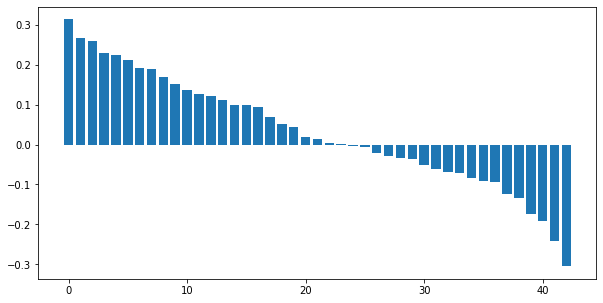

In [281]:
#--Storytelling/Inferential Statistics--
#Visualization of all attributes (avg and std) plotted in bar chart
attribute_list1=list(corr_frame.loc[:,0])
y_pos1=np.arange(len(attribute_list1))
atb1=list(corr_frame2.loc[:,1])
plt.figure(figsize=(10,5))
plt.bar(y_pos1,atb1)
plt.show()

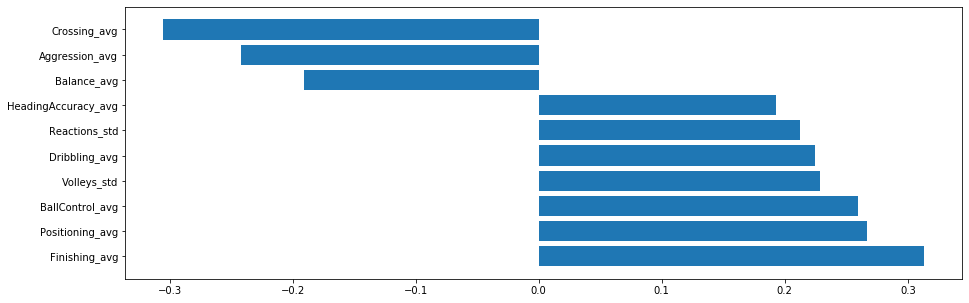

In [282]:
#--Storytelling/Inferential Statistics--
#bar chart of correlations of that exceed the set threshold in either direction
attribute_list2=list(attribute_selection.loc[:,0])
y_pos=np.arange(len(attribute_list2))
atb=list(attribute_selection.loc[:,1])
plt.figure(figsize=(15,5))
plt.barh(y_pos,atb)
plt.yticks(y_pos,attribute_list2)
plt.show()

In [198]:
#The above tuple and chart shows pearson correlation of x(the delta of each team's top five player average of each offensive
#attribute and the average of all attributes, indicating how much better or worse that team is at that attribute compared
#to it's overall) and y(the residual of expected vs. actual offensive success as determined by goals). The relationship is
#meant to assess the relationship between skillsets and success agnostic of the team's level of strength. The attributes
#that stand out as having a particularily strong impact on success are ball controll, dribbling, finishing, heading
#accuracy, positioning, and a wide range of reactions and vollying ability. The skills that
#are "overrated" are aggression, balance, and crossing.

Index(['Aggression_avg', 'Agility_avg'], dtype='object')
